In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.ID.nunique

<bound method IndexOpsMixin.nunique of 0        5524
1        2174
2        4141
3        6182
4        5324
        ...  
2235    10870
2236     4001
2237     7270
2238     8235
2239     9405
Name: ID, Length: 2240, dtype: int64>

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Income']= df.Income.fillna(df['Income'].mean())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
df[df.Income>500000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


In [9]:
df=df.drop(2233)

In [10]:
df.shape

(2239, 29)

<AxesSubplot:>

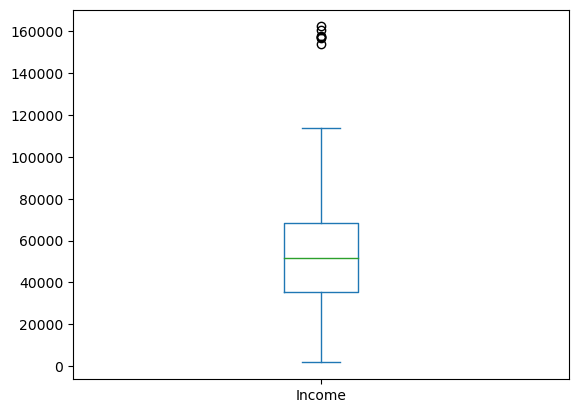

In [11]:
df.Income.plot(kind='box')

In [12]:
df['Age']= 2023- df['Year_Birth']

<AxesSubplot:>

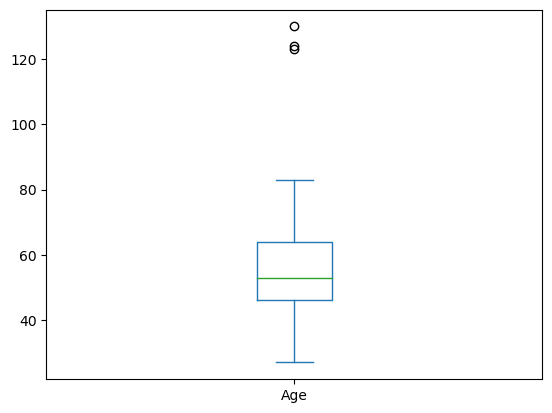

In [13]:
df.Age.plot(kind='box')

In [14]:
df[df['Age']>100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,123
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,130
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,124


In [15]:
df=df.drop([192,239,339])

In [16]:
df.shape

(2236, 30)

In [17]:
df['total_spent']= df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [18]:
df['Education']=df['Education'].replace(['Basic','2n Cycle'],'Under Graduate')

In [19]:
df['Education']=df['Education'].replace(['Master','PhD'],'Post Graduate')

In [20]:
df['Education']= df['Education'].replace(['Graduation'],'Graduate')

In [21]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'In Relationship')

In [22]:
df['Marital_Status']=df['Marital_Status'].replace(['Single','Divorced','Widow', 'Alone','Absurd','YOLO'],'Single')

In [23]:
df['parent']= df['Kidhome']+df['Teenhome']

In [24]:
df['total_accepted_coupons']= df['AcceptedCmp3']+ df['AcceptedCmp4']+ df['AcceptedCmp5']+ df['AcceptedCmp1']+df['AcceptedCmp2']

In [25]:
df['number_of_total_purchases']= df['NumDealsPurchases']+ df['NumWebPurchases']+df['NumCatalogPurchases']+ df['NumStorePurchases']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2236 non-null   int64  
 1   Year_Birth                 2236 non-null   int64  
 2   Education                  2236 non-null   object 
 3   Marital_Status             2236 non-null   object 
 4   Income                     2236 non-null   float64
 5   Kidhome                    2236 non-null   int64  
 6   Teenhome                   2236 non-null   int64  
 7   Dt_Customer                2236 non-null   object 
 8   Recency                    2236 non-null   int64  
 9   MntWines                   2236 non-null   int64  
 10  MntFruits                  2236 non-null   int64  
 11  MntMeatProducts            2236 non-null   int64  
 12  MntFishProducts            2236 non-null   int64  
 13  MntSweetProducts           2236 non-null   int64

In [27]:
df.shape

(2236, 34)

In [28]:
df.drop(['ID','Z_CostContact','Z_Revenue', 'Dt_Customer','Year_Birth'],axis=1,inplace=True)

In [29]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,66,1617,0,0,25
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,69,27,2,0,6


In [30]:
df.to_csv('not_scaled_data.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_9416\1038510677.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


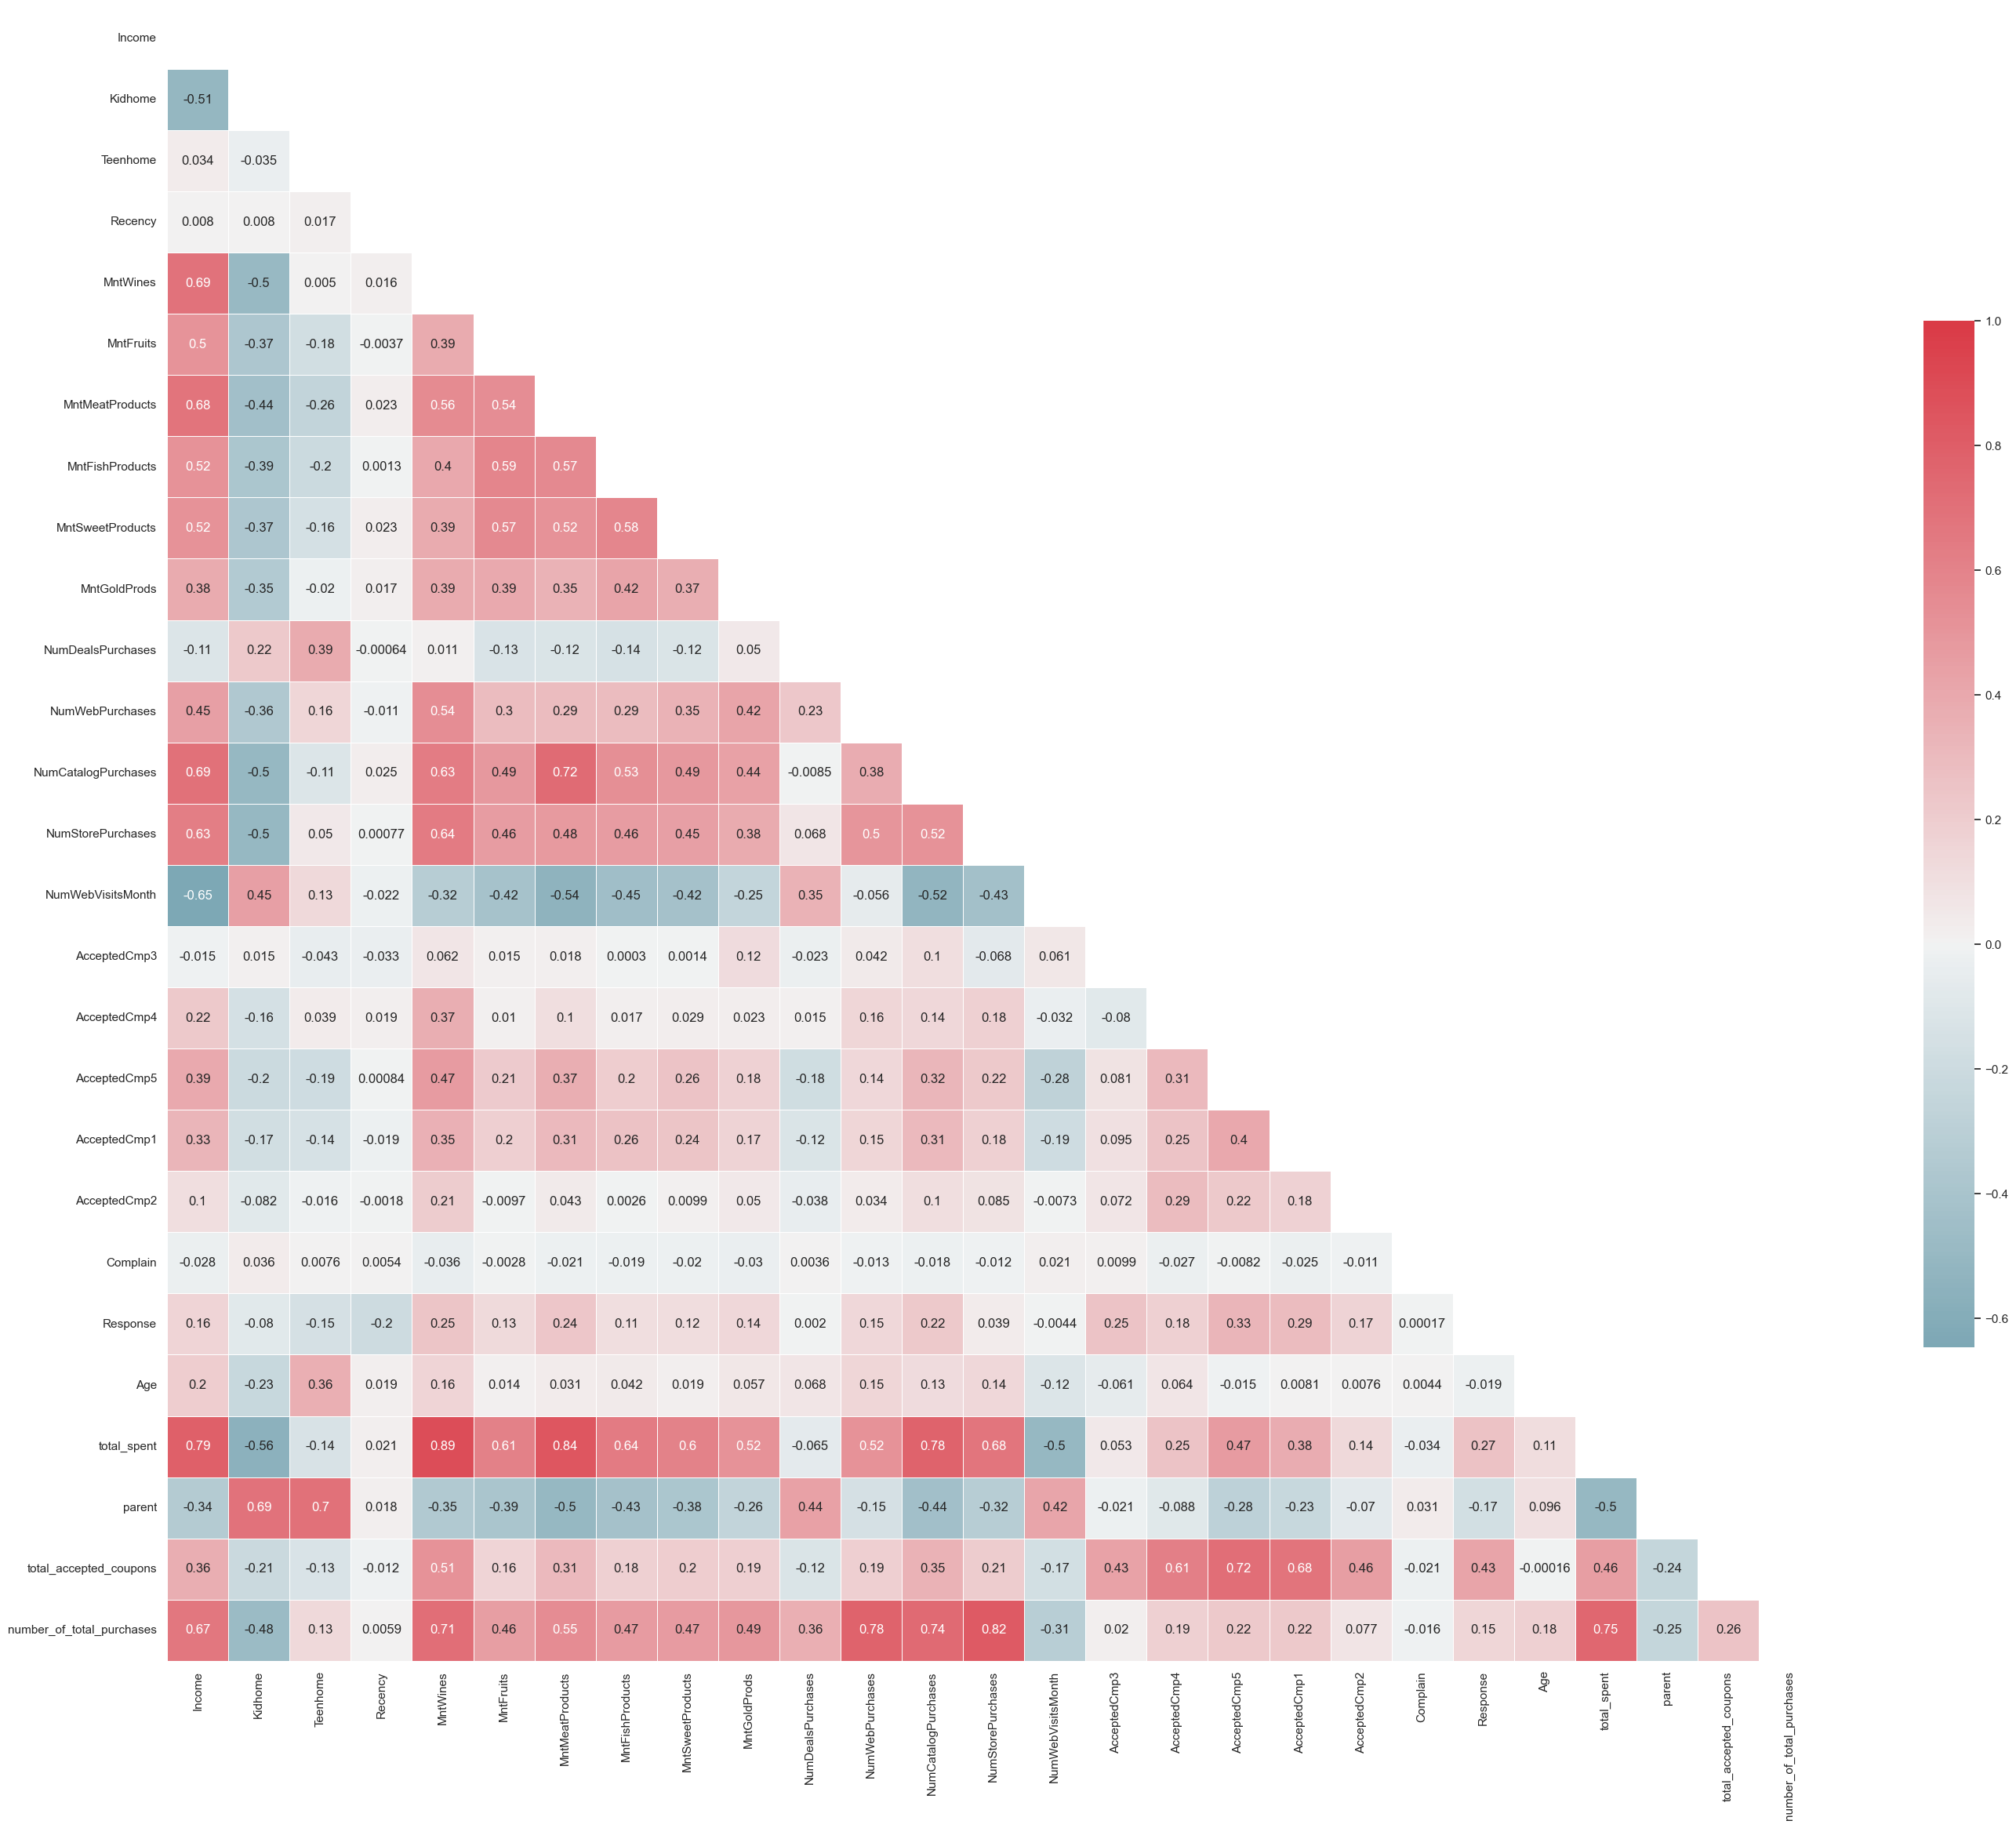

In [31]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(34, 34))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

## Label Encoding

In [32]:
cols=df[['Education','Marital_Status']]

In [33]:
le=LabelEncoder()

In [34]:
for i in cols:
    df[i]= le.fit_transform(df[i])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2236 non-null   int32  
 1   Marital_Status             2236 non-null   int32  
 2   Income                     2236 non-null   float64
 3   Kidhome                    2236 non-null   int64  
 4   Teenhome                   2236 non-null   int64  
 5   Recency                    2236 non-null   int64  
 6   MntWines                   2236 non-null   int64  
 7   MntFruits                  2236 non-null   int64  
 8   MntMeatProducts            2236 non-null   int64  
 9   MntFishProducts            2236 non-null   int64  
 10  MntSweetProducts           2236 non-null   int64  
 11  MntGoldProds               2236 non-null   int64  
 12  NumDealsPurchases          2236 non-null   int64  
 13  NumWebPurchases            2236 non-null   int64

In [36]:
df.Education.value_counts()

0    1126
1     855
2     255
Name: Education, dtype: int64

In [37]:
df.Marital_Status.value_counts()

0    1442
1     794
Name: Marital_Status, dtype: int64

## Standard Scaler

In [38]:
scaler=StandardScaler()

In [39]:
scaled_data= scaler.fit_transform(df)

In [40]:
scaled_data=pd.DataFrame(scaled_data, columns=df.columns)

In [41]:
scaled_data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857
2,-0.89438,-0.742041,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-1.264308,-0.438933,0.798246
3,-0.89438,-0.742041,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.065416,-0.438933,-0.895310
4,0.57070,-0.742041,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.065416,-0.438933,0.537699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.89438,-0.742041,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.162216,1.221499,0.065416,-0.438933,0.407425
2232,0.57070,-0.742041,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,...,-0.279482,3.811532,-0.116616,-0.095001,-0.419052,1.956986,-0.269201,2.724862,1.034721,0.928519
2233,-0.89438,1.347635,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,1.055312,-1.264308,1.034721,0.537699
2234,0.57070,-0.742041,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.102333,0.393886,0.065416,-0.438933,1.058793


In [42]:
scaled_data.to_csv('scaled_data.csv')

## K means without dimension reductionality

In [43]:
data= scaled_data.copy()

In [44]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

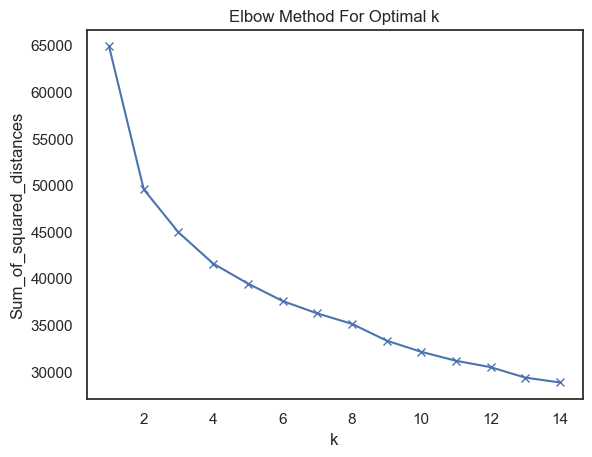

In [45]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [46]:
model = KMeans(n_clusters=4, random_state=42).fit(data)

preds = model.predict(data)

data['clusters'] = preds

<AxesSubplot:>

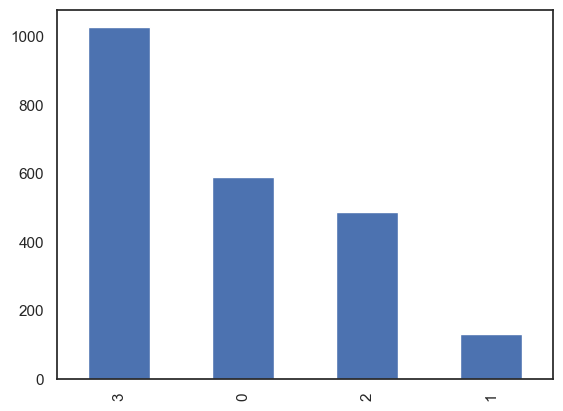

In [47]:
data.clusters.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='total_spent', ylabel='Income'>

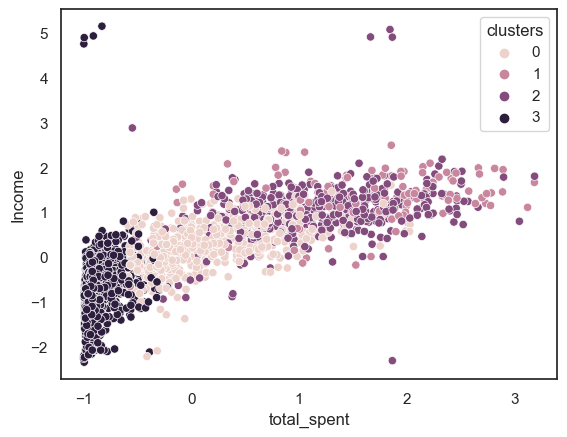

In [48]:
sns.scatterplot(x=data.total_spent, y=data.Income, hue=data.clusters, data=df)

In [49]:
new_df= df.copy()

In [50]:
new_df['clusters'] = preds

<AxesSubplot:xlabel='total_spent', ylabel='Income'>

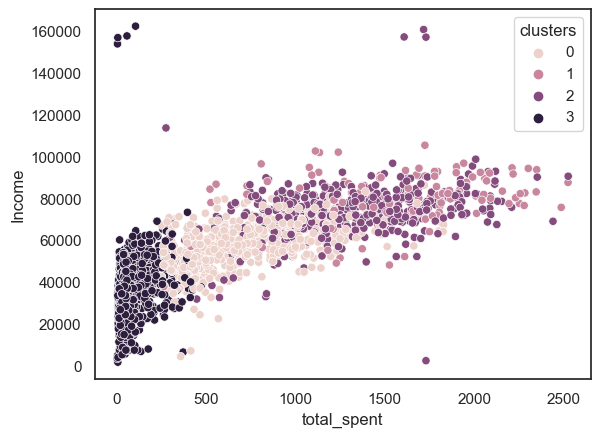

In [51]:
sns.scatterplot(x=new_df.total_spent, y=new_df.Income, hue=new_df.clusters, data=new_df)

<AxesSubplot:xlabel='total_accepted_coupons', ylabel='count'>

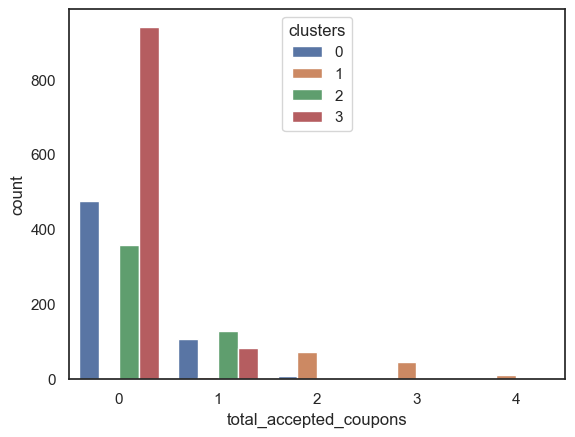

In [52]:
sns.countplot(x=new_df.total_accepted_coupons, hue=new_df.clusters, data=new_df)

In [53]:
new_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases', 'clusters'],
      dtype='object')

In [54]:
cols=data[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

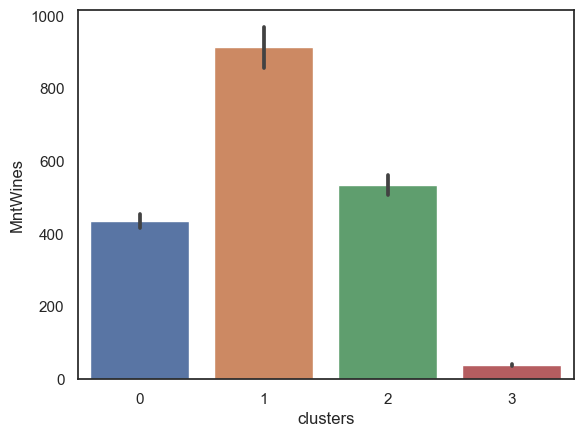

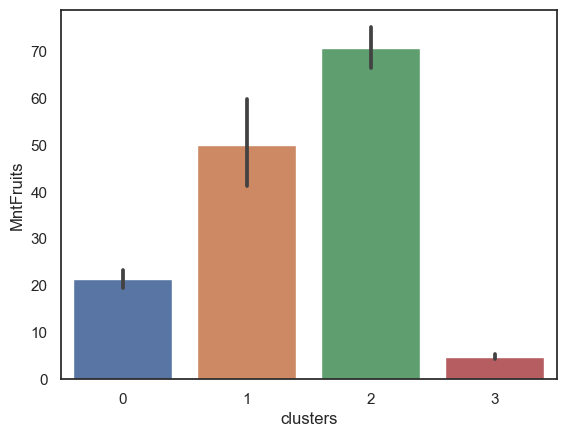

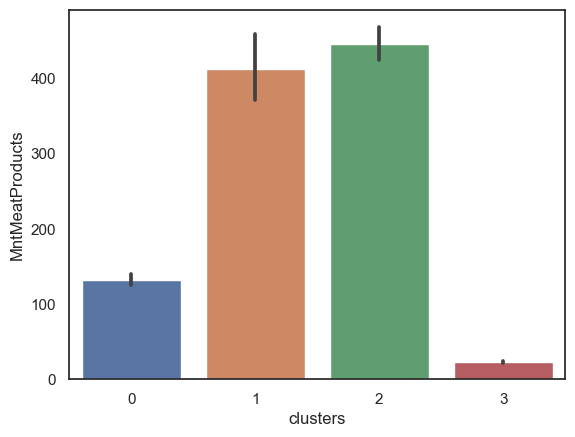

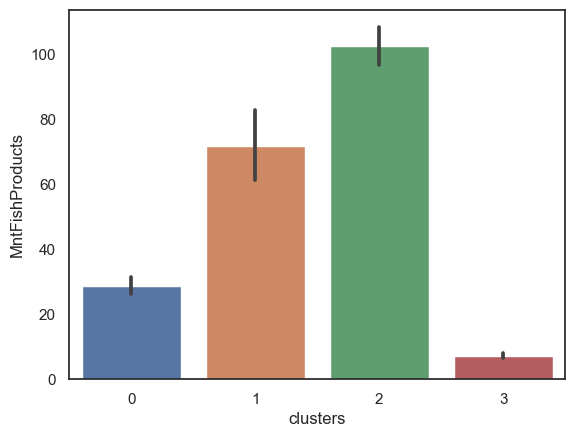

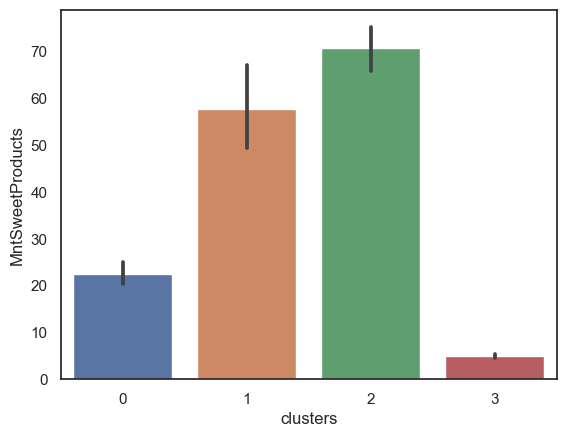

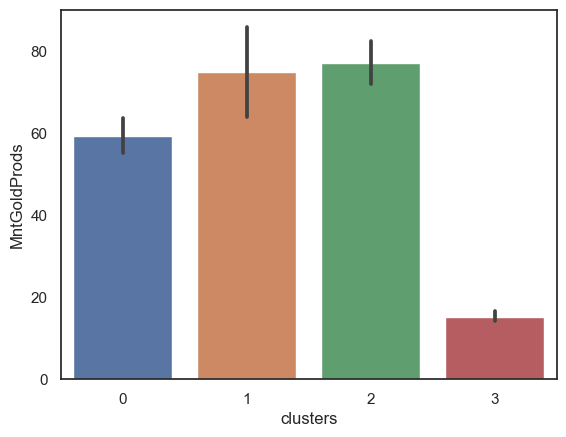

In [55]:
for i in cols:
    plt.subplots()
    sns.barplot(y=new_df[i], x=new_df.clusters, data=new_df)

In [56]:
new_cols=data[['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']]

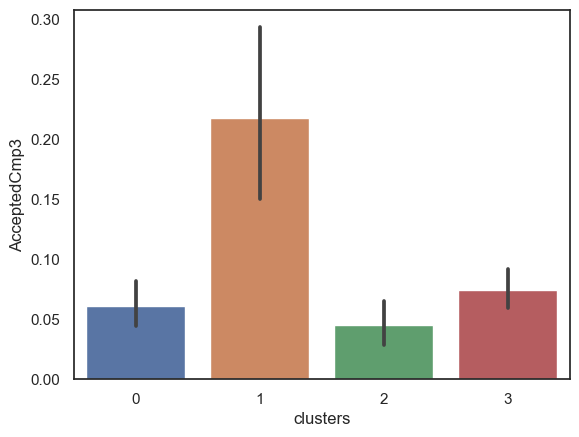

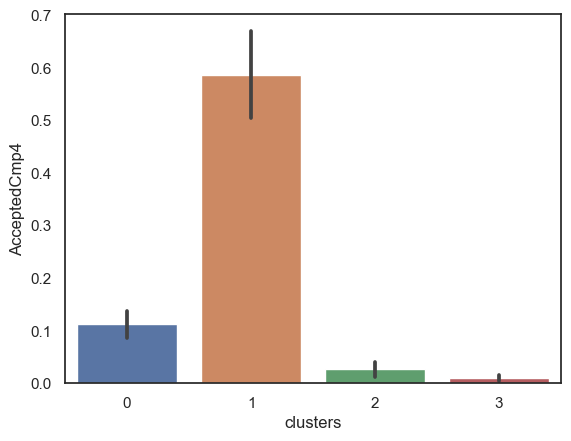

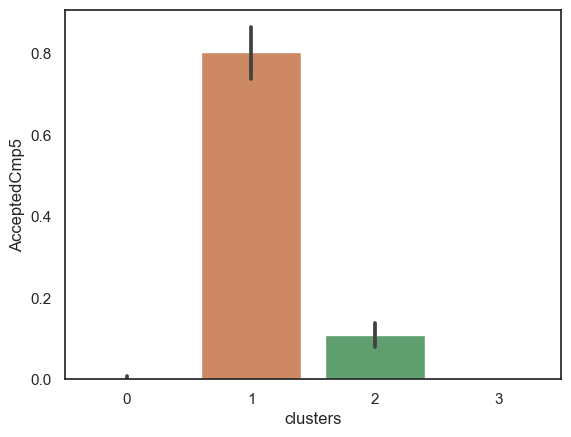

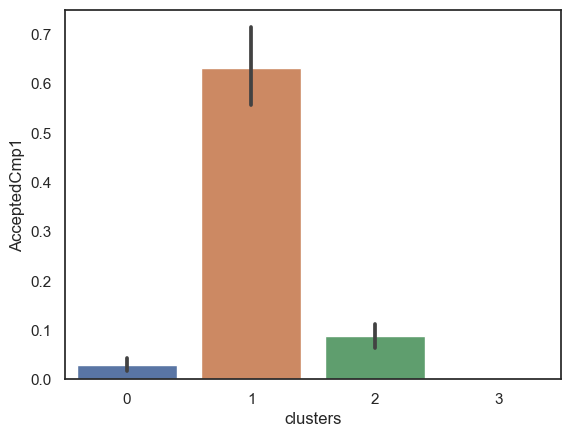

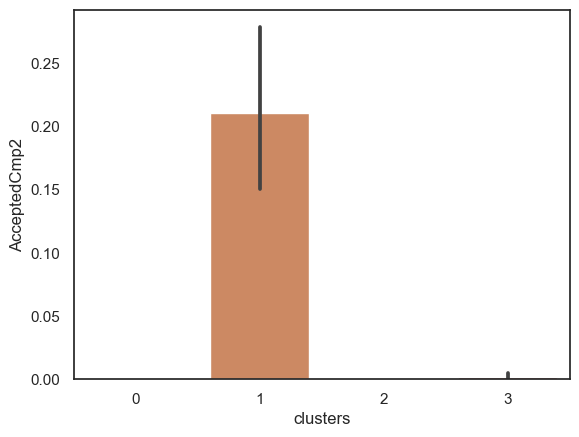

In [57]:
for i in new_cols:
    plt.subplots()
    sns.barplot(y=new_df[i], x=new_df.clusters, data=new_df)

<AxesSubplot:xlabel='clusters', ylabel='total_accepted_coupons'>

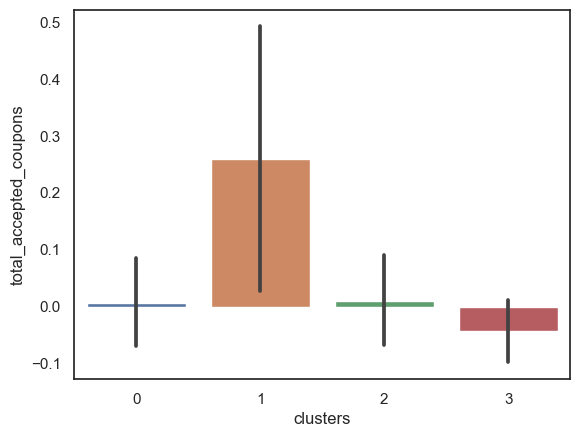

In [58]:

sns.barplot(y=data.total_accepted_coupons, x=new_df.clusters, data=new_df)

<AxesSubplot:xlabel='clusters', ylabel='total_spent'>

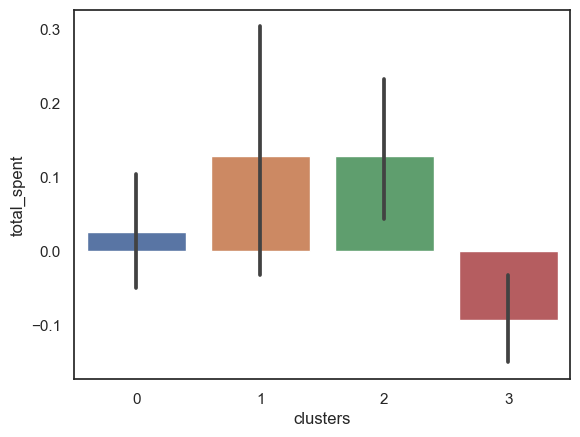

In [59]:

sns.barplot(y=data.total_spent, x=new_df.clusters, data=new_df)

<AxesSubplot:xlabel='clusters', ylabel='Income'>

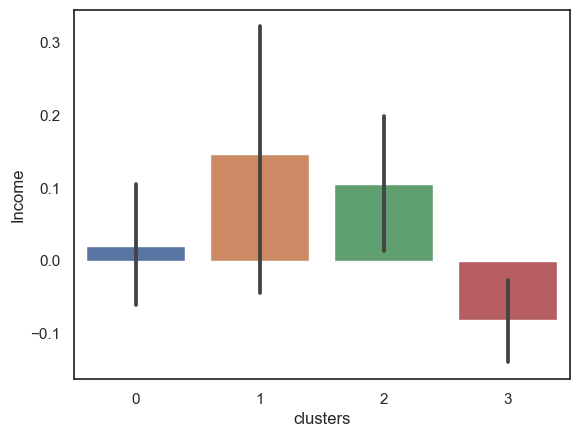

In [60]:
sns.barplot(y=data.Income, x=new_df.clusters, data=new_df)

<AxesSubplot:xlabel='clusters', ylabel='Marital_Status'>

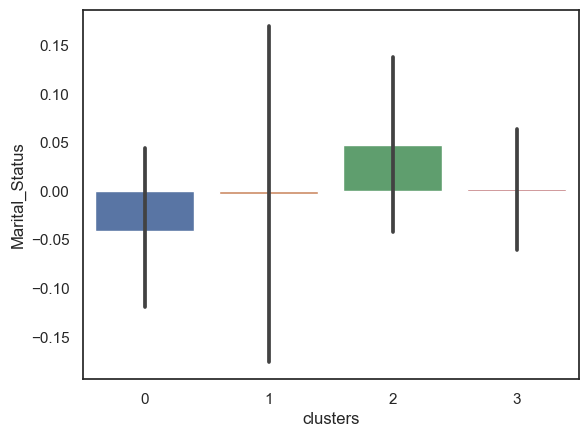

In [61]:
sns.barplot(y=data.Marital_Status, x=new_df.clusters, data=new_df)

<AxesSubplot:xlabel='clusters', ylabel='parent'>

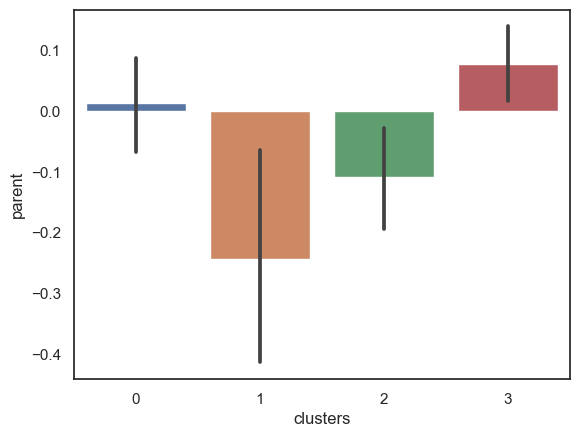

In [62]:
sns.barplot(y=data.parent, x=new_df.clusters, data=new_df)

<AxesSubplot:xlabel='clusters', ylabel='NumWebVisitsMonth'>

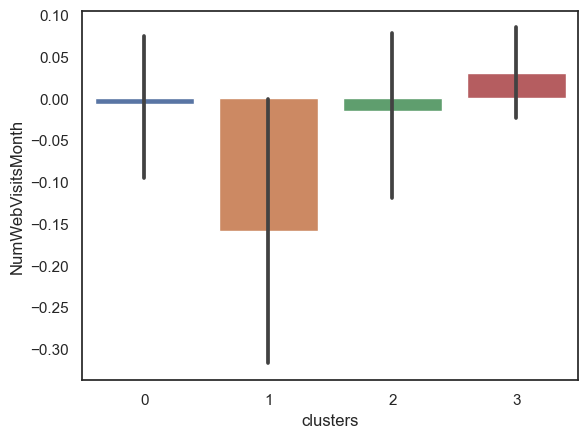

In [63]:
sns.barplot(y=data.NumWebVisitsMonth, x=new_df.clusters, data=new_df)